# Aarav Gosalia

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="ticks", font_scale=0.8)

In [23]:
dataset = pd.read_csv("../data/raw/dataset_raw.csv",low_memory=False)

In [24]:
data = dataset[["region_group","country","year","Location","literacy_1524_no"]]
data.describe()

,year,literacy_1524_no
count,212879.000000,25557.00000
mean,2009.909070,787.90531
std,5.434321,1825.95407
min,1996.000000,30.00000
25%,2006.000000,104.00000
50%,2011.000000,253.00000
75%,2015.000000,732.00000
max,2019.000000,55976.00000


In [18]:
data.describe(exclude=[np.number])

,region_group,country,Location
count,212939,212879,94809
unique,7,176,2
top,Latin America and the Caribbean,Brazil,Urban
freq,58636,6538,51664


In [25]:
data = data.dropna(subset="literacy_1524_no")
data = data.reset_index()
data = data.drop(columns = ["index"])
data = data.rename(columns = {"literacy_1524_no" : "literacy_rates"})

In [31]:
functions = {'country': 'first','year': 'first','literacy_rates': 'sum','region_group' : 'first'}
data_final = data.groupby(["country","year"]).agg(functions)

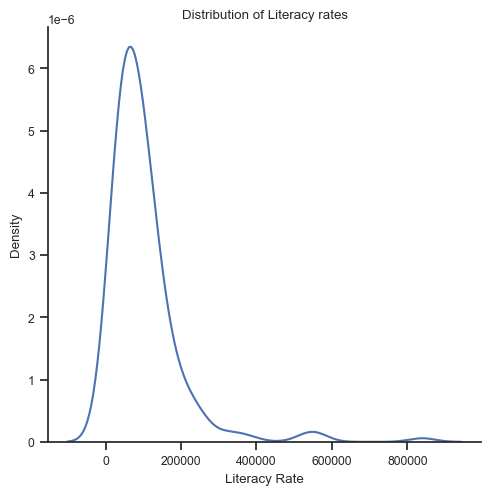

In [9]:
sns.displot(data_final["literacy_1524_no"], kind = "kde").set(xlabel = "Literacy Rate", title = "Distribution of Literacy rates")
#can be used to choose base value of literacy rate to see which countries are considered already literate 

In [18]:
counts = data_final.country.value_counts()
data_plot = data_final[data_final.country.isin(counts.index[counts.gt(2)])]

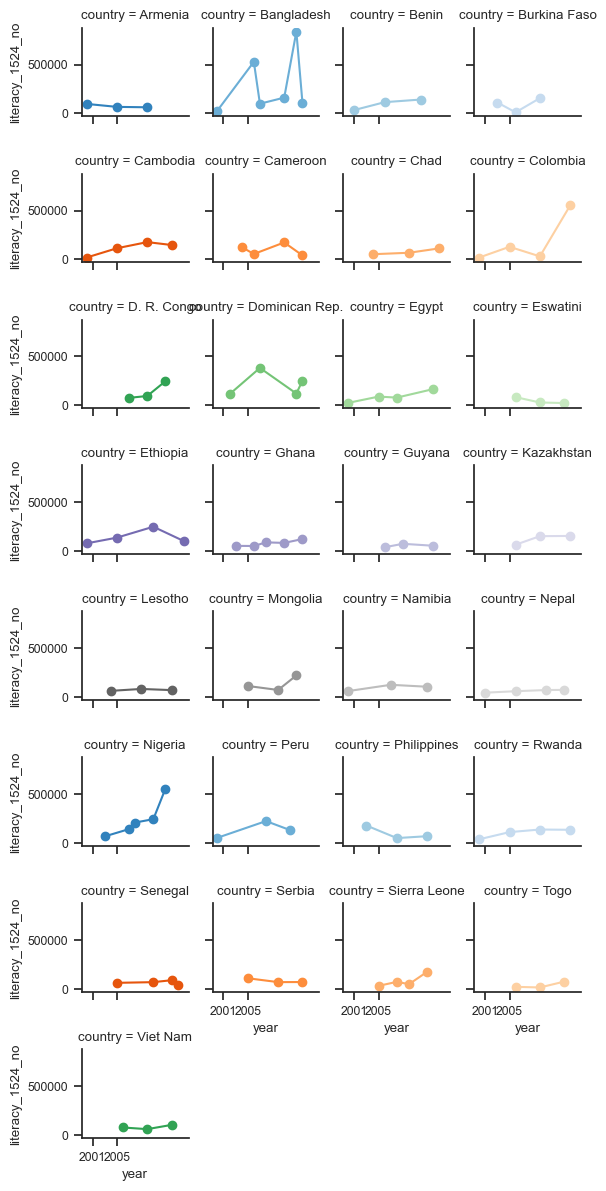

In [31]:
grid = sns.FacetGrid(data_plot, col="country", hue="country", palette="tab20c", col_wrap=4, height=1.5)
grid.map(plt.plot, "year", "literacy_1524_no", marker="o")
grid.set(xticks=[2001,2005])

## Research question/interests
**Has there been a positive or negative change in literacy rates in previosly literate and non-literate countries and what could be the factors affecting it?**

Briefly describe your research question or interests here.

I will first filter out the countries which have only 1 year of data. Then I will check the first year of data collected for literacy number of different countries to classify them as previously literate or non-literate. Then I will plot two facetgrids containing literate and non-literate countries and compare literacy rates over the years and try to find some reasons and factors that have affected literacy rates.(ex. Economy condition, War)

In [30]:
def data_processing(url):
    data = (
        pd.read_csv(url,low_memory=False)
        .loc[:, ["region_group","country","year","Location","literacy_1524_no"]]
        .dropna(subset="literacy_1524_no")
        .reset_index()
        .drop(columns = ["index"])
        .rename(columns = {"literacy_1524_no" : "literacy_rates"})
    )
    
    functions = {'country': 'first','year': 'first','literacy_rates': 'sum','region_group' : 'first'}
    data_processed = (
        data.groupby(["country","year"]).agg(functions)
    )
    
    return data_processed

data_processing("../data/raw/dataset_raw.csv")
        
        

country    year  literacy_rates  \
country     year                                          
Afghanistan 2011.0  Afghanistan  2011.0         85415.0   
            2015.0  Afghanistan  2015.0        182068.0   
Albania     2005.0      Albania  2005.0         44296.0   
            2009.0      Albania  2009.0        111880.0   
Armenia     2000.0      Armenia  2000.0         94677.0   
...                         ...     ...             ...   
Viet Nam    2014.0     Viet Nam  2014.0        103726.0   
Yemen       2006.0        Yemen  2006.0         15773.0   
            2013.0        Yemen  2013.0         99328.0   
Zimbabwe    2009.0     Zimbabwe  2009.0        102657.0   
            2014.0     Zimbabwe  2014.0        114137.0   

                                        region_group  
country     year                                      
Afghanistan 2011.0         Central and Southern Asia  
            2015.0         Central and Southern Asia  
Albania     2005.0       Europe and Northern America  
            2009.0       Europe and Northern America  
Armenia     2000.0  Northern Africa and Western Asia  
...                                              ...  
Viet Nam    2014.0    Eastern and South-eastern Asia  
Yemen       2006.0  Northern Africa and Western Asia  
            2013.0  Northern Africa and Western Asia  
Zimbabwe    2009.0                Sub-Saharan Africa  
            2014.0                Sub-Saharan Africa  

[198 rows x 4 columns]